In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
from sklearn.datasets import load_digits
digits_dataset = load_digits()

In [3]:
digits_dataset['data'].shape

(1797, 64)

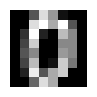

In [4]:
plt.figure(figsize=(1, 1))
plt.imshow(digits_dataset['data'][0].reshape((8, 8)), cmap='gray')
plt.axis('off')
plt.show()

In [5]:
X, y = digits_dataset['data'], digits_dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [6]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, random_state=42)

rf.fit(X_train, y_train)
rf.score(X_train, y_train), rf.score(X_test, y_test)

(1.0, 0.9755555555555555)

In [10]:
star = pd.read_csv("data-files/star-dataset.csv")
star

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [11]:
print(star['Star color'].unique())
print(star['Spectral Class'].unique())

['Red' 'Blue White' 'White' 'Yellowish White' 'Blue white'
 'Pale yellow orange' 'Blue' 'Blue-white' 'Whitish' 'yellow-white'
 'Orange' 'White-Yellow' 'white' 'Blue ' 'yellowish' 'Yellowish'
 'Orange-Red' 'Blue white ' 'Blue-White']
['M' 'B' 'A' 'F' 'O' 'K' 'G']


In [12]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)
ohe_features = ohe.fit_transform(star[['Star color', 'Spectral Class']])

In [13]:
ohe_features

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [14]:
ohe_columns = ohe.get_feature_names_out(['Star color', 'Spectral Class'])


df_encoded = pd.DataFrame(ohe_features, columns=ohe_columns)
star_dataset = pd.concat([star, df_encoded], axis=1).drop(['Star color', 'Spectral Class'], axis=1)


In [15]:
star_dataset

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color_Blue,Star color_Blue,Star color_Blue White,Star color_Blue white,Star color_Blue white,...,Star color_white,Star color_yellow-white,Star color_yellowish,Spectral Class_A,Spectral Class_B,Spectral Class_F,Spectral Class_G,Spectral Class_K,Spectral Class_M,Spectral Class_O
0,3068,0.002400,0.1700,16.12,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3042,0.000500,0.1542,16.60,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2600,0.000300,0.1020,18.70,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2800,0.000200,0.1600,16.65,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1939,0.000138,0.1030,20.06,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
236,30839,834042.000000,1194.0000,-10.63,5,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
237,8829,537493.000000,1423.0000,-10.73,5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
238,9235,404940.000000,1112.0000,-11.23,5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
X = star_dataset.drop("Star type", axis = 1)
y = star_dataset["Star type"]

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, random_state=42)

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, random_state=42)

rf.fit(X_train, y_train)
rf.score(X_train, y_train), rf.score(X_test, y_test)

(1.0, 1.0)

In [38]:
from sklearn.linear_model import LogisticRegression



scores = []
for c in [0.01, 0.1, 1, 10, 50, 100, 1000, 100000]:
    logreg = LogisticRegression(penalty='l2', C = c, max_iter=10000)
    logreg.fit(X_train, y_train)
    tr_score= logreg.score(X_train, y_train)
    te_score= logreg.score(X_test, y_test)
    scores.append( (c, tr_score, te_score) )

c:\Users\human\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\human\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [39]:
scores

[(0.01, 0.9944444444444445, 0.9833333333333333),
 (0.1, 0.9944444444444445, 0.9833333333333333),
 (1, 0.9888888888888889, 0.9833333333333333),
 (10, 0.9944444444444445, 1.0),
 (50, 1.0, 1.0),
 (100, 1.0, 1.0),
 (1000, 0.9944444444444445, 1.0),
 (100000, 1.0, 0.9833333333333333)]